In [1]:
#The purpose of Exploratory Data Analysis (EDA) is to understand the dataset before building models for analytics application. 
#In the EDA process, steps are taken below;
#Step 1: Import python libraries
#-----------------------------------------------------------------------------------
#Step 2: Reading dataset
#-----------------------------------------------------------------------------------
#Step 3: Data reduction
#-----------------------------------------------------------------------------------
#Step 4: Data Cleaning
#-----------------------------------------------------------------------------------
#Step 5: Data Transformation
#-----------------------------------------------------------------------------------
#Step 6: Creating features
#-----------------------------------------------------------------------------------
#Step 7: EDA Analysis with the use of data visualisations(line-graph, bar-graph, histograms)
#-----------------------------------------------------------------------------------
#Step 8: Statistics Summary

In [2]:
#Step 1: Import python libraries
#-----------------------------------------------------------------------------------
#This step imports necessary libraries to use required modules/functions
import sqlite3 as sql
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
#Step 2: Reading dataset
#-----------------------------------------------------------------------------------
#This step would involve understanding the dataset for analyzing
#To understand the dataset size, characteristics of features in order to choose suitable machine learning algorithms 
#to build models.
db=sql.connect("lung_cancer.db")
sql_table = """SELECT name FROM sqlite_master WHERE type='table';"""
cursor=db.cursor()
c = cursor.execute(sql_table)
print(c.fetchall())

[('lung_cancer',)]


In [4]:
#The table name for lung_cancer.db file is lung_cancer.

In [5]:
post= """ SELECT * FROM lung_cancer"""
data=pd.read_sql(post,db)
print("Lung Cancer Data")
print("1st 5 observations")
print(data.head())
print("---------------------------------------------------------------------------------")
print("")
print("Last 5 observations")
print(data.tail())
print("---------------------------------------------------------------------------------")
print("")
print("Data type and null values")
print(data.info())
print("NOTE:")
print("")
print("Data types of features:")
print("Categorical = Object")
print("Discrete = Int")
print("Continuous = Float")
print("---------------------------------------------------------------------------------")
print("")
print("Number of NaNs")
print(data.isnull().sum())

Lung Cancer Data
1st 5 observations
             ID  Age Gender COPD History Genetic Markers  \
0  1.468154e+16   42   Male           No     Not Present   
1  1.271684e+18   72   Male          Yes     Not Present   
2  1.708068e+18   65   Male          Yes     Not Present   
3  3.555829e+17   67   Male           No     Not Present   
4  1.684598e+18   54   Male          Yes     Not Present   

  Air Pollution Exposure  Last Weight  Current Weight Start Smoking  \
0                 Medium           73              69          2015   
1                   High           50              42          2006   
2                    Low           65              75          1998   
3                   High           69              58          2011   
4                 Medium           46              40          1994   

    Stop Smoking Taken Bronchodilators Frequency of Tiredness Dominant Hand  \
0           2020                    No             None / Low         Right   
1           2012  

In [6]:
#Based on the above, we can see that the dataset is rather huge with 10,348 patients' medical records, which algorithms that
#can handle large data will be desirable in model-building.
#Also, majority of the data characteristics are of categorical type, which means that supervised machine learning techniques
#would be more preferrable in model-building for this dataset.
#Assuming that no datetime factors in this dataset requires running date and time in order for accuracy to be at 100%,
#the NaN values will be dropped in Step 4: Data Cleaning.

In [7]:
#Step 3: Data reduction
#-----------------------------------------------------------------------------------------
#In this step, columns which do not contribute to this projects' analysis will be dropped.
#The feature "ID" will be dropped in this case since the patients' medical records are relevant in this analysis.
data=data.drop(["ID"],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     10348 non-null  int64 
 1   Gender                  10348 non-null  object
 2   COPD History            9236 non-null   object
 3   Genetic Markers         10348 non-null  object
 4   Air Pollution Exposure  10345 non-null  object
 5   Last Weight             10348 non-null  int64 
 6   Current Weight          10348 non-null  int64 
 7   Start Smoking           10348 non-null  object
 8   Stop Smoking            10348 non-null  object
 9   Taken Bronchodilators   9287 non-null   object
 10  Frequency of Tiredness  10348 non-null  object
 11  Dominant Hand           10348 non-null  object
 12  Lung Cancer Occurrence  10348 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.0+ MB


In [8]:
#The above summary shows that the irrelevant feature 'ID' has been dropped from the dataset.

In [9]:
#Step 4: Data Cleaning
#-----------------------------------------------------------------------------------------
#NaN values will be dropped in this step for ease of data transformation and analytics
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8706 entries, 0 to 10346
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     8706 non-null   int64 
 1   Gender                  8706 non-null   object
 2   COPD History            8706 non-null   object
 3   Genetic Markers         8706 non-null   object
 4   Air Pollution Exposure  8706 non-null   object
 5   Last Weight             8706 non-null   int64 
 6   Current Weight          8706 non-null   int64 
 7   Start Smoking           8706 non-null   object
 8   Stop Smoking            8706 non-null   object
 9   Taken Bronchodilators   8706 non-null   object
 10  Frequency of Tiredness  8706 non-null   object
 11  Dominant Hand           8706 non-null   object
 12  Lung Cancer Occurrence  8706 non-null   int64 
dtypes: int64(4), object(9)
memory usage: 952.2+ KB


In [10]:
#Step 5: Data Transformation
#-----------------------------------------------------------------------------------------
#In this step, data is transformed for ease of features creation and analytics purposes
data['Stop Smoking']=data['Stop Smoking'].replace(['Still Smoking','Not Applicable'],[2024,0])
data['Start Smoking']=data['Start Smoking'].replace('Not Applicable',0)
data[['Stop Smoking','Start Smoking']]=data[['Stop Smoking','Start Smoking']].astype(int)
data['Frequency of Tiredness']=data['Frequency of Tiredness'].replace('None / Low','Low')
print(data.head(20))
print(data.info())

    Age Gender COPD History Genetic Markers Air Pollution Exposure  \
0    42   Male           No     Not Present                 Medium   
1    72   Male          Yes     Not Present                   High   
2    65   Male          Yes     Not Present                    Low   
3    67   Male           No     Not Present                   High   
4    54   Male          Yes     Not Present                 Medium   
5    49   Male          Yes         Present                    Low   
6    57   Male          Yes         Present                 Medium   
7    50   Male           No     Not Present                   High   
9    68   Male          Yes     Not Present                    Low   
10   48   Male          Yes         Present                    Low   
11   72   Male           No     Not Present                   High   
13   52   Male           No         Present                    Low   
14   77   Male          Yes         Present                   High   
15   37   Male      

In [11]:
#Upon data transformation, consistency of the data in features were checked, and 'Dominant Hand' shows slight data inconsistency.
#Transformation will be done on feature 'Dominant Hand' to replace data 'RightBoth' with 'Right'.
data['Dominant Hand']=data['Dominant Hand'].replace('RightBoth','Right')
data.head(20)

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence
0,42,Male,No,Not Present,Medium,73,69,2015,2020,No,Low,Right,1
1,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1
2,65,Male,Yes,Not Present,Low,65,75,1998,2024,Yes,Low,Right,0
3,67,Male,No,Not Present,High,69,58,2011,2014,No,Low,Right,1
4,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,Low,Right,0
5,49,Male,Yes,Present,Low,67,60,2001,2024,Yes,Medium,Right,0
6,57,Male,Yes,Present,Medium,67,58,1982,2020,Yes,Low,Right,0
7,50,Male,No,Not Present,High,91,95,1996,2024,No,Medium,Right,1
9,68,Male,Yes,Not Present,Low,45,46,2020,2022,Yes,Medium,Right,0
10,48,Male,Yes,Present,Low,65,60,2008,2009,Yes,Low,Left,0


In [12]:
#Step 6: Creating features
#-----------------------------------------------------------------------------------------
#Upon confirming that data is consistent within the dataset, new features will be created for synthetic features.
data['Smoking Duration(Years)']=data['Stop Smoking']-data['Start Smoking']
data['Weight Difference']=data['Current Weight']-data['Last Weight']
data.head(20)

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Last Weight,Current Weight,Start Smoking,Stop Smoking,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence,Smoking Duration(Years),Weight Difference
0,42,Male,No,Not Present,Medium,73,69,2015,2020,No,Low,Right,1,5,-4
1,72,Male,Yes,Not Present,High,50,42,2006,2012,Yes,Medium,Right,1,6,-8
2,65,Male,Yes,Not Present,Low,65,75,1998,2024,Yes,Low,Right,0,26,10
3,67,Male,No,Not Present,High,69,58,2011,2014,No,Low,Right,1,3,-11
4,54,Male,Yes,Not Present,Medium,46,40,1994,2017,Yes,Low,Right,0,23,-6
5,49,Male,Yes,Present,Low,67,60,2001,2024,Yes,Medium,Right,0,23,-7
6,57,Male,Yes,Present,Medium,67,58,1982,2020,Yes,Low,Right,0,38,-9
7,50,Male,No,Not Present,High,91,95,1996,2024,No,Medium,Right,1,28,4
9,68,Male,Yes,Not Present,Low,45,46,2020,2022,Yes,Medium,Right,0,2,1
10,48,Male,Yes,Present,Low,65,60,2008,2009,Yes,Low,Left,0,1,-5


In [13]:
#Based on the above results output, we can see that 2 new features have been created. 'Smoking Duration(Years)' shows the number
#of years the patients have smoked, and 'Weight Difference' shows the change in weight of the patient where a negative number
#indicates a weight loss, and a positive number indicates a weight gain.
#The synthetic features will be dropped since new features have been created in correspond with these features.
data=data.drop(['Start Smoking','Stop Smoking','Current Weight','Last Weight'], axis=1)
data.head(20)

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence,Smoking Duration(Years),Weight Difference
0,42,Male,No,Not Present,Medium,No,Low,Right,1,5,-4
1,72,Male,Yes,Not Present,High,Yes,Medium,Right,1,6,-8
2,65,Male,Yes,Not Present,Low,Yes,Low,Right,0,26,10
3,67,Male,No,Not Present,High,No,Low,Right,1,3,-11
4,54,Male,Yes,Not Present,Medium,Yes,Low,Right,0,23,-6
5,49,Male,Yes,Present,Low,Yes,Medium,Right,0,23,-7
6,57,Male,Yes,Present,Medium,Yes,Low,Right,0,38,-9
7,50,Male,No,Not Present,High,No,Medium,Right,1,28,4
9,68,Male,Yes,Not Present,Low,Yes,Medium,Right,0,2,1
10,48,Male,Yes,Present,Low,Yes,Low,Left,0,1,-5


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8706 entries, 0 to 10346
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      8706 non-null   int64 
 1   Gender                   8706 non-null   object
 2   COPD History             8706 non-null   object
 3   Genetic Markers          8706 non-null   object
 4   Air Pollution Exposure   8706 non-null   object
 5   Taken Bronchodilators    8706 non-null   object
 6   Frequency of Tiredness   8706 non-null   object
 7   Dominant Hand            8706 non-null   object
 8   Lung Cancer Occurrence   8706 non-null   int64 
 9   Smoking Duration(Years)  8706 non-null   int32 
 10  Weight Difference        8706 non-null   int64 
dtypes: int32(1), int64(3), object(7)
memory usage: 782.2+ KB


In [15]:
#Upon data cleanup, 11 columns and 8706 rows remain in the dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

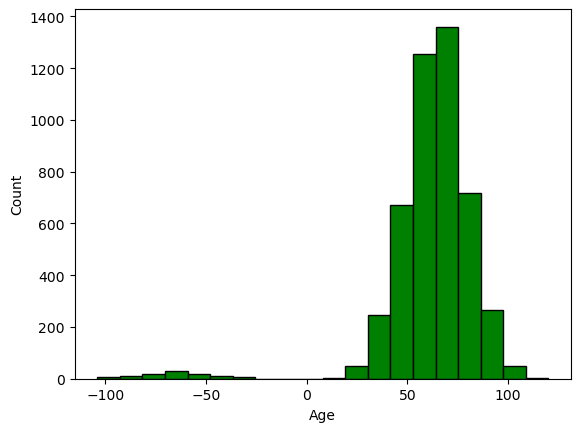

In [16]:
#Step 7: EDA Analysis with the use of data visualisations(histogram)
#-----------------------------------------------------------------------------------------
#Each feature is analysed based on the occurrence of lung cancer
#New variables will be created for ease of use for sets of data between each feature and 'Lung Cancer Occurrence'
#Since we're only interested in how the features to the occurrence of lung cancer, only data=1 in 'Lung Cancer Occurrence'
#feature will be used in this EDA visual analysis
Occur=data['Lung Cancer Occurrence']==1
Age=data['Age'][Occur]
Gender=data['Gender'][Occur]
COPD=data['COPD History'][Occur]
GenM=data['Genetic Markers'][Occur]
AirP=data['Air Pollution Exposure'][Occur]
Bron=data['Taken Bronchodilators'][Occur]
Freq=data['Frequency of Tiredness'][Occur]
Dom=data['Dominant Hand'][Occur]
Smoke=data['Smoking Duration(Years)'][Occur]
Weight=data['Weight Difference'][Occur]
plt.hist([Age], edgecolor = 'black', color='green', bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

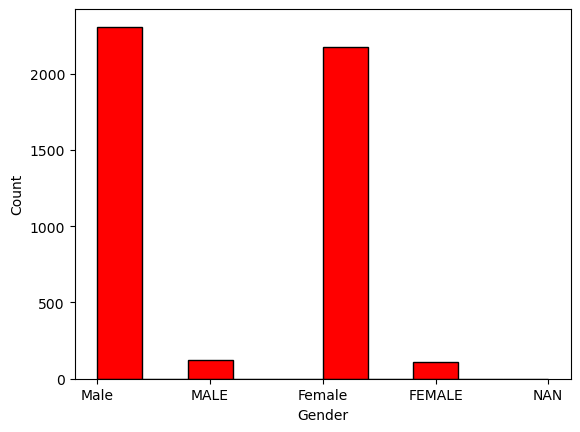

In [17]:
plt.hist([Gender], edgecolor = 'black', color=['red'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

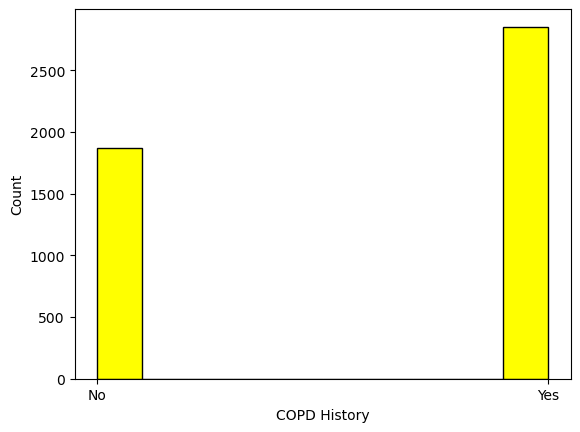

In [18]:
plt.hist([COPD], edgecolor='black', color='yellow')
plt.xlabel('COPD History')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

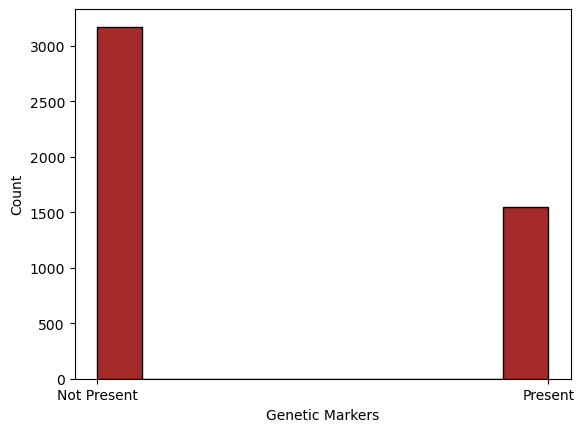

In [19]:
plt.hist([GenM], edgecolor='black', color='brown')
plt.xlabel('Genetic Markers')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

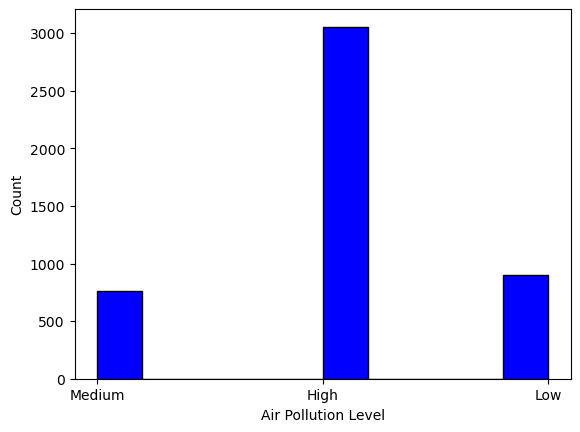

In [20]:
plt.hist([AirP], edgecolor='black', color='blue')
plt.xlabel('Air Pollution Level')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

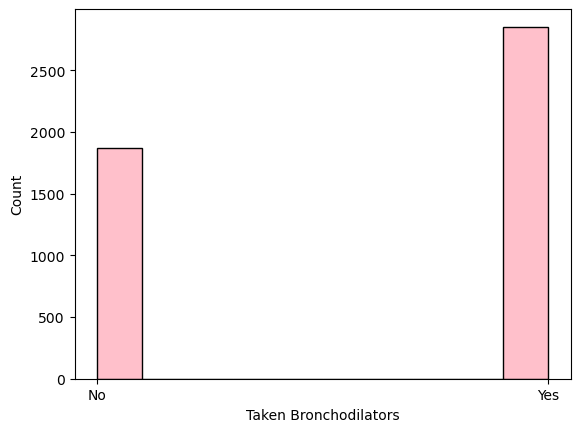

In [21]:
plt.hist([Bron], edgecolor='black', color='pink')
plt.xlabel('Taken Bronchodilators')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

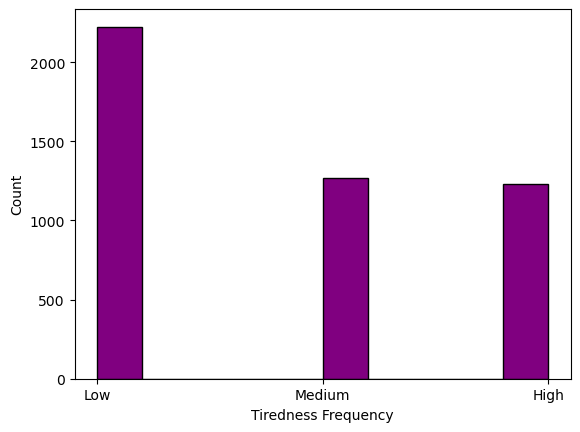

In [22]:
plt.hist([Freq], edgecolor='black', color='purple')
plt.xlabel('Tiredness Frequency')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

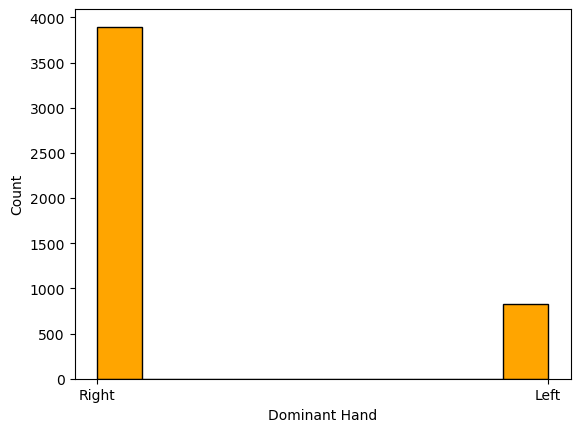

In [23]:
plt.hist([Dom], edgecolor='black', color='orange')
plt.xlabel('Dominant Hand')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

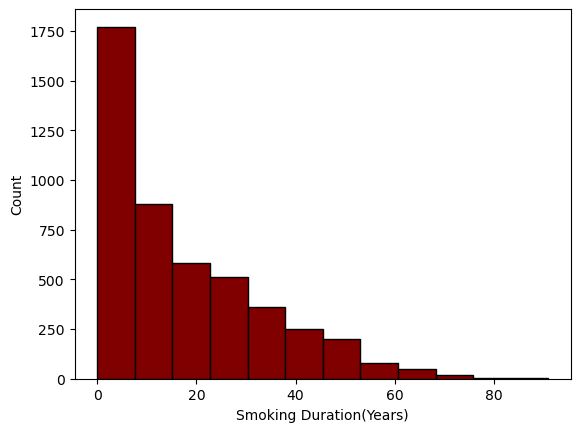

In [24]:
plt.hist([Smoke], edgecolor='black', color='maroon', bins=12)
plt.xlabel('Smoking Duration(Years)')
plt.ylabel('Count')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

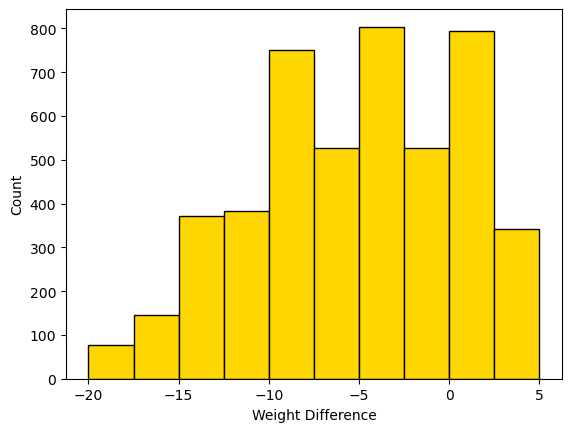

In [25]:
plt.hist([Weight], edgecolor='black', color='gold')
plt.xlabel('Weight Difference')
plt.ylabel('Count')
plt.show

In [26]:
#The purpose of this EDA is to examine the statistical pattern in relation between lung cancer occurrence and each feature.
#Based on the above graphs output, we can see that:
#1) Patients aged between 50-80 have the highest rate of lung cancer occurrence.
#2) Lung cancer occurs more in male than female.
#3) There's a higher chance of lung cancer occurrence for patients with COPD history.
#4) Patients without genetic markers have a higher chance of lung cancer occurrence.
#5) Patients whom have been exposed to high levels of air pollution are more prone to lung cancer occurrence.
#6) Patients whom have taken bronchodilators have a higher rate of lung cancer occurrence.
#7) Lung cancer occurrence is seen in patients with low level of tiredness frequency.
#8) Patients with their right hands as dominant hand have a higher rate of lung cancer occurrence.
#9) There is a higher rate of lung cancer occurrence in patients whom smokes between 0-20 years.
#10) Patients whom gained 0-2.5kg, lose 2.5kg-5kg and 7.5kg-10kg have higher rates of lung cancer occurrence.

In [27]:
#Step 8: Statistics Summary
#-----------------------------------------------------------------------------------------
#The statistics summary is used to show us the presence of any outliers and the trend of data distribution
data.describe(include='all')

,Age,Gender,COPD History,Genetic Markers,Air Pollution Exposure,Taken Bronchodilators,Frequency of Tiredness,Dominant Hand,Lung Cancer Occurrence,Smoking Duration(Years),Weight Difference
count,8706.000000,8706,8706,8706,8706,8706,8706,8706,8706.000000,8706.000000,8706.000000
unique,NaN,5,2,2,3,2,3,2,NaN,NaN,NaN
top,NaN,Male,Yes,Not Present,High,Yes,Low,Right,NaN,NaN,NaN
freq,NaN,4715,5382,6524,5241,5382,4047,7224,NaN,NaN,NaN
mean,61.347117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.542040,17.580634,-2.952447
std,23.569236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498258,17.034782,6.709482
min,-104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-20.000000
25%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,4.000000,-8.000000
50%,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,13.000000,-3.000000
75%,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,27.000000,2.000000


In [ ]:
#The summary statistics output above shows the different data distribution trends within each feature, an example would be
#The mean number of years where patients smoked is 17.58 years, while the data is widely spread across the dataset with a standard
#deviation of 17.03.